### Wie kann eine Kostenfunktion/Fehlerfunktion aussehen?

Eine Fehlerfunktion gibt prinzipiell die Abweichung eines gegebenen Ausgabevektors von einem
gegebenen erwarteten Ausgabevektor an.

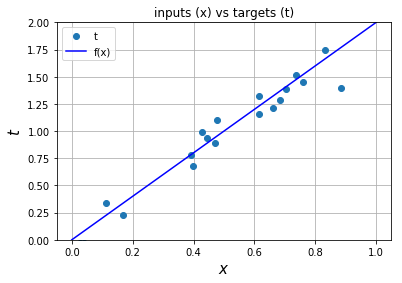

In [4]:
import numpy as np 
import matplotlib.pyplot as plt

# Wir definieren 20 Zufallszahlen zwischen 0 und 1
x = np.random.uniform(0, 1, 20)

# Wir definieren eine Funktion (in dem Fall eine Gerade) über die Punkte x -> f(x) = 2x
def f(x): return x * 2

# Wir erzeugen etwas normalverteiltes Rauschen mit gewisser Variance
noise_variance = 0.2  
noise = np.random.randn(x.shape[0]) * noise_variance
# und fügen den Punkte etwas Rauschen hinzu 
t = f(x) + noise

# Wir plotten die Punkte mit Rauschen und die Funktion
plt.plot(x, t, 'o', label='t')

plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$t$', fontsize=15)
plt.ylim([0,2])
plt.title('inputs (x) vs targets (t)')
plt.grid()
plt.legend(loc=2)
plt.show()

Wir optimieren dieses Model $\mathbf{y} = \mathbf{x} * w$ durch optimieren des Parameters $w$ so, dass die [squared error cost](http://en.wikipedia.org/wiki/Euclidean_distance#Squared_Euclidean_distance) über alle Datenpunkte minimiert wird (siehe Least-Squares). Der quadratische Fehler ist definiert als $\theta = \sum_{i=1}^{N} \Vert t_i - y_i \Vert ^2$, wobei $N$ die Anzahl der Datenpunkte im Trainingsdatensatz ist. Ziel der Optimierung ist daher:  $\underset{w}{\text{argmin}} \sum_{i=1}^{N} \Vert t_i - y_i \Vert^2$.   
Hinweis: Wir nehmen hier die Summe der Fehler über alle Datenpunkte - das bezeichnet man auch als Batch-Training. Man könnte den Parameter auch immer nach einem einzelnen Datenpunkte anpassen. 
Hinweis: Hier wird der quadratische Fehler als Kostenfunktion genutzt. In der Hausaufgabe nutzen wir dafür die Kreuz-entropie Fehlerfunktion (cross-entropie cost function) - siehe unten.

Die Fehlerfunktion für die Variable $w$ lässt sich - wie unten dargestellt - auch darstellen. Wobei $w=2$ das Minimum der Funktion ist. 

Angenommen unser neuronales Netz ist im Moment nur die Darstellung von $w *x + b$ - also der lineare Klassifikator, dann lässt sich diese wie folgt implementieren: `nn(x, w)` mit der Kostenfunktion (Fehlerfunktion) `cost(y, t)`.

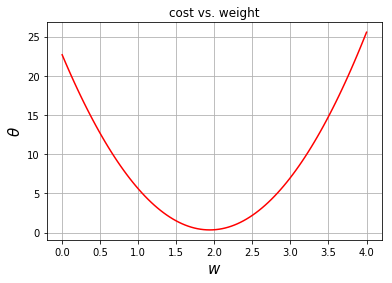

In [5]:
# Beispiel eines SEHR einfachen Neuronales Netzwerkes y = x * w
def nn(x, w): return x * w

# Definition der Kostenfunktion
def cost(y, t): return ((t - y)**2).sum()

# Plotten des Fehlers (Kosten) gegeben eines Gewichtes w
# ws = np.linspace(-2, 4, num=100)  # Gewichte
# func = np.vectorize(lambda w: cost(nn(x, w) , t))
# cost_ws = func(ws)  # Kosten an der Stelle der Gewichte

ws = np.linspace(0, 4, num=100)  # weight values
cost_ws = np.vectorize(lambda w: cost(nn(x, w) , t))(ws)  # cost for each weight in ws


# Plot
plt.plot(ws, cost_ws, 'r-')
plt.xlabel('$w$', fontsize=15)
plt.ylabel('$\\theta$', fontsize=15)
plt.title('cost vs. weight')
plt.grid()
plt.show()

### Optimierung der Fehlerfunktion

Für eine einfache Kostenfunktion wie diese können wir schon sehen, wo die optimale Gewichtung $w$ liegen sollte. Aber die Oberfläche der Fehlerfunktion kann sehr komplex werden und mit jedem weiteren Parameter erhöht sich die Dimension der Oberfläche. Deswegen nutzen wir hier Methoden der Mathematischen Optimierung ([optimization techniques](https://en.wikipedia.org/wiki/Mathematical_optimization)) um das Minimum der Funktion zu finden.

### Gradientabstiegsverfahren

Ein Optimierungsverfahren, dass beim Trainieren von Neuronalen Netzes häufig eingesetzt wird nennt sich Gradientabstiegsverfahren ([gradient descent](http://en.wikipedia.org/wiki/Gradient_descent)). Dabei nutzt man den Gradienten der Fehlerfunktion $\theta$ bezüglich der Parameter an einer bestimmten Stelle der Kostenfunktion und optimiert die Parameter in Richtung des negativen Gradienten (Richtung zum Minimum). Der Parameter $w$ wird dabei iterativ angepasst:

$$w(k+1) = w(k) - \Delta w(k)$$

$w(k)$ ist der Wert $w$ in der Iteration $k$ während des Gradientenabstiegs.  
$\Delta w$ ist definiert als:

$$\Delta w = \mu \frac{\partial \theta}{\partial w}$$

$\mu$ ist die Lernrate, also wie groß der Schritt in Richtung des Gradienten ist, und ${\partial \theta}/{\partial w}$ ist der Gradient der Fehlerfunktion $\theta$ bezüglich $w$. Für jeden Datenpunkt $i$ kann man den Gradienten  etnsprechend der [Kettenregel](http://en.wikipedia.org/wiki/Chain_rule) aufteilen:

$$\frac{\partial \theta_i}{\partial w} = \frac{\partial y_i}{\partial w} \frac{\partial \theta_i}{\partial y_i}$$

wobei $\theta_i$ die quadratische Fehlerfunktion ist, also kann man ${\partial \theta_i}/{\partial y_i}$ auch als:

$$\frac{\partial \theta_i}{\partial y_i} = \frac{\partial (t_i - y_i)^2}{\partial y_i} = - 2 (t_i - y_i) = 2 (y_i - t_i)$$

schreiben. Da gilt: $y_i = x_i * w$ können wir auch schreiben ${\partial y_i}/{\partial w}$:

$$\frac{\partial y_i}{\partial w} = \frac{\partial (x_i * w)}{\partial w} = x_i $$

Daraus folgt, dass $w$ durch $\Delta w$ für jeden Datenpunkt $i$ angepasst wird:

$$\Delta w = \mu * \frac{\partial \theta_i}{\partial w} = \mu * 2 x_i (y_i - t_i)$$

In der Batch-Verarbeitung addieren wir die Gradienten für alle Datenpunkte einfach auf:

$$\Delta w = \mu * 2 * \sum_{i=1}^{N} x_i (y_i - t_i)$$

Das Gradientenabstiegsverfahren wird typischerweise mit zufälligen Parametern initialisiert und solange interiert, $\Delta w$ sich nicht mehr ändert. Die Lernrate wird dann separat als Hyperparameter angepasst. 

Der Gradient ${\partial \theta}/{\partial w}$ kann als Funktion `gradient(w, x, t)` implementiert werden. $\Delta w$ wird über `delta_w(w_k, x, t, learning_rate)` berechnet. Hier werden 10 Iterationen des Gradientenabstiegs durchgeführt und Parameter und Kosten ausgegeben.

Mehr zu dem Gradientabstieg und der Rückführung von Fehlern (Backpropagation) dann in der kommenden Veranstaltung.


In [6]:
# Gradientenfunktion - Zur Erinnerung: y = nn(x, w) = x * w
def gradient(w, x, t): 
    return 2 * x * (nn(x, w) - t)

# Die Updatefunktion delta w
def delta_w(w_k, x, t, learning_rate):
    return learning_rate * gradient(w_k, x, t).sum()

# Initialer Gewichtungsparameter
w = 0.1
# Lernrate
learning_rate = 0.1

# Gradientabstieg für 10 Iterationen
num_iterations = 10  
w_cost = [(w, cost(nn(x, w), t))]

for i in range(num_iterations):
    dw = delta_w(w, x, t, learning_rate)  
    w = w - dw  # Update der Parameter
    w_cost.append((w, cost(nn(x, w), t)))  

# Print the final w, and cost
for i in range(0, len(w_cost)):
    print('w({}): {:.4f} \t cost: {:.4f}'.format(i, w_cost[i][0], w_cost[i][1]))

w(0): 0.1000 	 cost: 20.4340
w(1): 2.2840 	 cost: 1.0516
w(2): 1.8749 	 cost: 0.3714
w(3): 1.9516 	 cost: 0.3475
w(4): 1.9372 	 cost: 0.3467
w(5): 1.9399 	 cost: 0.3467
w(6): 1.9394 	 cost: 0.3467
w(7): 1.9395 	 cost: 0.3467
w(8): 1.9395 	 cost: 0.3467
w(9): 1.9395 	 cost: 0.3467
w(10): 1.9395 	 cost: 0.3467


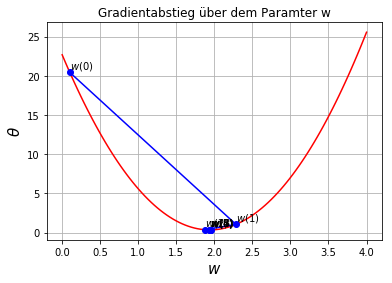

In [7]:
# Plotten der Parameter
plt.plot(ws, cost_ws, 'r-')  # Plot the error curve
# Plot the updates
for i in range(0, len(w_cost)-2):
    w1, c1 = w_cost[i]
    w2, c2 = w_cost[i+1]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.5, '$w({})$'.format(i)) 
# Show figure
plt.xlabel('$w$', fontsize=15)
plt.ylabel('$\\theta$', fontsize=15)
plt.title('Gradientabstieg über dem Paramter w')
plt.grid()
plt.show()

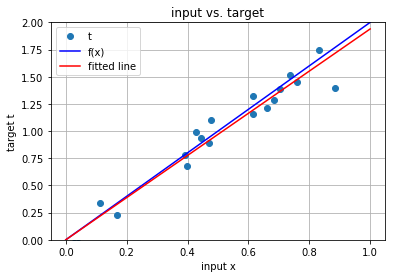

In [8]:
w = 0
# Start performing the gradient descent updates
nb_of_iterations = 10  # number of gradient descent updates
for i in range(nb_of_iterations):
    dw = delta_w(w, x, t, learning_rate)  # get the delta w update
    w = w - dw  # update the current weight parameter
    
# Plot the fitted line agains the target line
# Plot the target t versus the input x
plt.plot(x, t, 'o', label='t')
# Plot the initial line
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
# plot the fitted line
plt.plot([0, 1], [0*w, 1*w], 'r-', label='fitted line')
plt.xlabel('input x')
plt.ylabel('target t')
plt.ylim([0,2])
plt.title('input vs. target')
plt.grid()
plt.legend(loc=2)
plt.show()

### Softmax Klassifikator

Die Softmax-Funktion $\varsigma$ transformiert einen $K$-dimensionalen Vektor $\mathbf{z}$ in einen $K$-dimensionalen Vektor $\mathbf{y}$ mit Werten zwischen $0$ und $1$. Die Funktion ist eine normalisierte Exponentialfunktion und definiert als:

$$ y_k = \varsigma(\mathbf{z})_k = \frac{e^{z_k}}{\sum_{d=1}^K e^{z_d}} \quad \text{für} \; k = 1 \cdots K$$

Der Nenner $\sum_{d=1}^K e^{z_d}$ stellt sicher, dass $\sum_{k=1}^K y_k = 1$. Die Ausgabe eines neuronalen Netzes kann durch die Softmax-Funktion als Layer mit $K$ Neuronen dargestellt werden.

Es lässt sich auch herleiten, dass $P(t=k | \mathbf{z})$ die Wahrscheinlichkeit ist, die die Klasse $k$ hat gegeben der Eingabe $\mathbf{z}$.

$$ 
\begin{bmatrix} 
P(t=1 | \mathbf{z}) \\
\vdots \\
P(t=K | \mathbf{z}) \\
\end{bmatrix}
= 
\begin{bmatrix} 
\varsigma(\mathbf{z})_1 \\
\vdots \\
\varsigma(\mathbf{z})_K \\
\end{bmatrix}
= \frac{1}{\sum_{d=1}^K e^{z_d}}
\begin{bmatrix} 
e^{z_1} \\
\vdots \\
e^{z_K} \\
\end{bmatrix}
$$

Daraus kann man dann folgende Fehlerfunktion ableiten (die sogenannte Kreuzentropie-Fehlerfunktion):
$$
\theta = -\log ( \frac{e^{z_k}}{\sum_{d=1}^K e^{z_d}} )
$$


In [9]:
import numpy as np
import math
# f = np.array([123, 456, 789]) # Beispiel hier mit 3 Klassen kann manchmal zu numerischen Problemen führen
# p = np.exp(f) / np.sum(np.exp(f)) # Bad: Numeric problem, potential blowup

# Deshalb verschiebt man alle Werte von f so, dass der grösste Wert 0 ist

def softmax(f):
    f -= np.max(f) # f becomes [-666, -333, 0]
    return np.exp(f) / np.sum(np.exp(f)) # safe to do, gives the correct answer


f = np.matrix('0.5 -0.76 -0.7')
probabilities = softmax(f)
print(probabilities)
# print("probs", probabilities.shape, scores.shape)
# average cross-entropy loss
y = 1
logprobs = -np.log(probabilities[0, y])
print(logprobs)

[[0.63097524 0.17897867 0.19004609]]
1.7204886541090711


### Wie feuert ein einzelnes Neuron (Forward-Pass)?


Nehmen wir uns eine kurzes Beispiel anhand des Katzenbildes aus der Vorlesung und definieren ein Neuron mit einer vorgegebenen Gewichtungsmatrix. 


Der Vorwärtsschritt in einem Neuronalen Netz rechnet dann das Skalarprodukt der Eingabe in das Neuron mit der Gewichtungsmatrix.

In [10]:
class Neuron(object):
    def __init__(self):
#         self.weights = np.matrix('0.2 -0.5 0.1 2.0 1.1; 1.5 1.3 2.1 0.0 3.2; 0 0.25 0.2 -0.3 -1.2')
        self.weights = np.matrix('0.2 -0.5 0.1 2.0 1.1')

    def forward(self, inputs):
        """Vorwärtsschritt - Bias ist in der Gewichtungsmatrix enthalten."""
        
        print(self.weights, inputs.shape)
        cell_body_sum = np.dot(self.weights, inputs)
        print(cell_body_sum)
#         firing_rate = 1.0 / (1.0 + math.exp(-cell_body_sum)) # sigmoid activation function
        firing_rate = np.maximum(0.0, cell_body_sum)
        return firing_rate


n = Neuron()
input = np.matrix('56; 231; 24; 2; 1')

activation = n.forward(input)
print(activation)

[[ 0.2 -0.5  0.1  2.   1.1]] (5, 1)
[[-96.8]]
[[0.]]


In [13]:
class TwoLayerNeuralNet:

    def __init__(self, input_size, hidden_size, output_size, std=1e-4):
        
        self.W1 = std * np.random.randn(input_size, hidden_size) 
        self.b1 = np.zeros(hidden_size)
        self.W2 = std * np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros(output_size)

    def softmax(self, z):
        z -= np.max(z)
        return np.exp(z) / np.sum(np.exp(z), axis=1)


    def loss(self, X, y=None, reg=0.0):
        N, D = X.shape
        scores = None
        
        weights1 = np.dot(X, self.W1) + self.b1
        # ReLU
        activation1 = np.maximum(0.0, weights1)
        scores = np.dot(activation1, self.W2) + self.b2
        print(scores.shape)
        probabilities = self.softmax(scores)
        correct_logprobs = -np.log(probabilities[range(N), y])
        print("cor", correct_logprobs, probabilities, probabilities[range(N), y])
        loss = np.sum(correct_logprobs) / N
        
        return loss
    
input = np.matrix('56 231 24 2')
y = np.matrix('2')

input_size = 4
hidden_size = 3
num_classes = 10
net = TwoLayerNeuralNet(input_size, hidden_size, num_classes)
loss = net.loss(input, y)
print(loss)


(1, 10)
cor [[2.30259042]] [[0.09999988 0.10000051 0.09999947 0.09999995 0.10000004 0.10000044
  0.0999999  0.10000056 0.09999978 0.09999948]] [[0.09999947]]
2.3025904186966106
